In [195]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [197]:
df = pd.read_csv('train.csv')

---
## Transfomations:

In [198]:
# rename the columns names using lower case and replace space with '_'
def rename_columns(df):
    df.columns = [columns.lower().replace(" ","_") for columns in df.columns]
    return df

df = rename_columns(df)

In [199]:
# add 1st_flr_sf and 2nd_flr_sf and create a new column total_sf
def create_total_sf(df):
    df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf']
    return df
df = create_total_sf(df)

In [201]:
# sum up all the qualites ( basement + kitchen + exter)
def all_qual(df):
    df['bsmt_qual_fillna'] = df['bsmt_qual'].copy()
    df['bsmt_qual_fillna'].fillna(6,inplace=True)
    df['bsmt_qual_fillna'] = df['bsmt_qual_fillna'].map({'Po':2,'Fa':2,'TA':3,'Gd':4,'Ex':5,6:2})
    
    df['kitchen_qual_new'] = df['kitchen_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
    
    df['exter_qual_new'] = df['exter_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
    
    df['all_qual'] = df['overall_qual'] + df['bsmt_qual_fillna'] + df['kitchen_qual_new'] + df['exter_qual_new']
    return df
df = all_qual(df)

In [8]:
# def bsmt_qual_alter(df):
#     df['bsmt_qual_test1'] = df['bsmt_qual'].map(lambda x: 'Fa' if str(x) == 'nan' or x == 'Po' else x)
#     df.drop('bsmt_qual',axis = 1,inplace=True)
#     return df
# df = bsmt_qual_alter(df)

In [9]:
# def bsmt_full_bath_na(df):
#     df['bsmt_full_bath'].fillna(0,inplace=True)
#     return df
    
# df = bsmt_full_bath_na(df)

In [10]:
def garage_cars_na(df):
    df = df[~df['garage_cars'].isnull()]
    return df
df = garage_cars_na(df)

In [11]:
def room_avg_size(df):
    df['room_avg_size'] = df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'] + df['kitchen_abvgr'])
    return df
df = room_avg_size(df)

In [12]:
def total_baths(df):
    df['total_baths'] = df['full_bath'] + 0.5*df['half_bath'] + 0.5* df['bsmt_full_bath'].fillna(0) + 0.5 *0.5* df['bsmt_half_bath'].fillna(0)
    return df
df = total_baths(df)

In [253]:
# def central_air_convert(df):
#     df['central_air'] = df['central_air'].map({'Y':1,'N':0})
#     return df
# df = central_air_convert(df)

---
## First try


In [48]:
df_1st = df[['overall_qual','year_built', 'exter_qual', 'bsmt_qual_test1', 'central_air','total_sf','bsmt_full_bath','full_bath','kitchen_qual','totrms_abvgrd','fireplaces','garage_cars','saleprice','room_avg_size']]

In [49]:
df_1st_dummy = pd.get_dummies(df_1st,drop_first=True)

In [50]:
X = df_1st_dummy.drop('saleprice', axis=1)
y = df_1st_dummy['saleprice']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [51]:
linreg_1 = LinearRegression()
linreg_1.fit(X_train,y_train)
linreg_1.score(X_train,y_train)

0.8265385234213605

In [114]:
linreg_1.score(X_test,y_test)

0.8530189256712726

In [52]:
cross_val_score(linreg_1,X_train,y_train,cv=10).mean()

0.8125124826975478

---
### compare

In [54]:
df_compare = df[['overall_qual','year_built', 'exter_qual', 'bsmt_qual_test1', 'central_air','total_sf','bsmt_full_bath','full_bath','kitchen_qual','totrms_abvgrd','fireplaces','garage_cars','saleprice']]

In [55]:
df_comp_dummy = pd.get_dummies(df_compare,drop_first=True)

In [56]:
X_comp = df_comp_dummy.drop('saleprice', axis=1)
y_comp = df_comp_dummy['saleprice']

X_train_comp,X_test_comp,y_train_comp,y_test_comp = train_test_split(X_comp,y_comp,random_state=42)

In [57]:
linreg_comp = LinearRegression()
linreg_comp.fit(X_train_comp,y_train_comp)

linreg_comp.score(X_train_comp,y_train_comp)

0.8233548875985597

In [113]:
linreg_comp.score(X_test_comp,y_test_comp)

0.8558706037472356

In [115]:
cross_val_score(linreg_comp,X_train_comp,y_train_comp,cv=10)

array([0.81687355, 0.85817739, 0.87370906, 0.842806  , 0.80654737,
       0.88871304, 0.86907093, 0.74961456, 0.57576861, 0.84398492])

---
### 3rd try

In [87]:
df_3rd = df[['all_qual', 'exter_qual', 'central_air','total_sf','kitchen_qual','totrms_abvgrd','fireplaces','garage_cars','saleprice','room_avg_size']]

In [88]:
df_3rd_dummies = pd.get_dummies(df_3rd,drop_first=True)

In [89]:
X_3rd = df_3rd_dummies.drop('saleprice',axis=1)
y_3rd = df_3rd_dummies['saleprice']

In [90]:
X_train_3rd,X_test_3rd,y_train_3rd,y_test_3rd = train_test_split(X_3rd,y_3rd,random_state=42)

In [91]:
linreg_3rd = LinearRegression()
linreg_3rd.fit(X_train_3rd,y_train_3rd)

linreg_3rd.score(X_train_3rd,y_train_3rd)

0.8131831831403985

In [112]:
linreg_3rd.score(X_test_3rd,y_test_3rd)

0.8462187744508909

In [94]:
cross_val_score(linreg_3rd,X_train_3rd,y_train_3rd,cv=10).mean()

0.8023681097053945

In [93]:
df_3rd.corr()

,all_qual,total_sf,totrms_abvgrd,fireplaces,garage_cars,saleprice,room_avg_size
all_qual,1.000000,0.556290,0.353668,0.372151,0.610605,0.817400,0.492171
total_sf,0.556290,1.000000,0.805640,0.461949,0.497681,0.705500,0.747194
totrms_abvgrd,0.353668,0.805640,1.000000,0.311710,0.368034,0.503990,0.265716
fireplaces,0.372151,0.461949,0.311710,1.000000,0.310687,0.471034,0.452987
garage_cars,0.610605,0.497681,0.368034,0.310687,1.000000,0.648220,0.380024
saleprice,0.817400,0.705500,0.503990,0.471034,0.648220,1.000000,0.592318
room_avg_size,0.492171,0.747194,0.265716,0.452987,0.380024,0.592318,1.000000


---
### 4th

In [227]:
df_4 = df[['all_qual', 'central_air','total_sf','kitchen_qual','totrms_abvgrd','fireplaces','garage_cars','room_avg_size','saleprice']]

In [228]:
df_4_dummies = pd.get_dummies(df_4,drop_first=True)

In [229]:
#df_4_dummies= sc.fit_transform(df_4_dummies)

In [230]:
X_4 = df_4_dummies.drop('saleprice',axis=1)
# X_4['total_sf'] = np.log(X_4['total_sf'])
y_4 = df_4_dummies['saleprice']

In [231]:
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(X_4,y_4,random_state=42)

In [232]:
linreg_4 = LinearRegression()
linreg_4.fit(X_train_4,y_train_4)

linreg_4.score(X_train_4,y_train_4)

0.8001526643120968

In [233]:
cross_val_score(linreg_3rd,X_train_3rd,y_train_3rd,cv=10)

array([0.79740497, 0.8457347 , 0.86309721, 0.81172187, 0.79805092,
       0.87058115, 0.86240229, 0.7514779 , 0.60065859, 0.8225515 ])

In [234]:
linreg_4.score(X_test_4,y_test_4)

0.8477975842062146

In [235]:
df_4.corr()

,all_qual,total_sf,totrms_abvgrd,fireplaces,garage_cars,room_avg_size,saleprice
all_qual,1.000000,0.556290,0.353668,0.372151,0.610605,0.492171,0.817400
total_sf,0.556290,1.000000,0.805640,0.461949,0.497681,0.747194,0.705500
totrms_abvgrd,0.353668,0.805640,1.000000,0.311710,0.368034,0.265716,0.503990
fireplaces,0.372151,0.461949,0.311710,1.000000,0.310687,0.452987,0.471034
garage_cars,0.610605,0.497681,0.368034,0.310687,1.000000,0.380024,0.648220
room_avg_size,0.492171,0.747194,0.265716,0.452987,0.380024,1.000000,0.592318
saleprice,0.817400,0.705500,0.503990,0.471034,0.648220,0.592318,1.000000


In [165]:
df_4.describe()

,all_qual,total_sf,totrms_abvgrd,fireplaces,garage_cars,saleprice,room_avg_size
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,9.656585,1493.654146,6.436098,0.591220,1.776585,181484.609268,159.731917
std,2.009037,497.685300,1.560576,0.638539,0.764537,79275.121591,29.058405
min,3.000000,334.000000,2.000000,0.000000,0.000000,12789.000000,74.285714
25%,8.000000,1124.250000,5.000000,0.000000,1.000000,129812.500000,139.777778
50%,9.000000,1440.000000,6.000000,1.000000,2.000000,162500.000000,156.857143
75%,11.000000,1728.000000,7.000000,1.000000,2.000000,214000.000000,175.156682
max,15.000000,5642.000000,15.000000,4.000000,5.000000,611657.000000,364.000000


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc=StandardScaler()

---
### Regulization

In [177]:
ela_net_2 = ElasticNet(alpha=0.1, l1_ratio=0.5)
ela_net_2.fit(X_train,y_train)
ela_net_2.score(X_train,y_train)

0.8055545704949139

In [179]:
cross_val_score(ela_net_2,X_train,y_train,cv=10).mean()

0.7947892494458273

In [243]:
df['central_air']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
2046    Y
2047    Y
2048    Y
2049    Y
2050    Y
Name: central_air, Length: 2050, dtype: object

In [240]:
np.mean([1,5,10,100])

29.0

In [ ]:
from sklearn

TA    1047
Gd     805
Ex     151
Fa      47

In [176]:
df_5 = df[['all_qual','year_built','total_sf','total_baths','totrms_abvgrd','fireplaces','garage_cars','room_avg_size','saleprice','kitchen_qual']]

In [177]:
df_5['kitchen_qual'] = df_5['kitchen_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
# df_5 = pd.get_dummies(df_5,drop_first=True)

In [179]:
X = df_5.drop('saleprice',axis=1)
y = df_5['saleprice']
y = np.log(df_5['saleprice'])

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [181]:
from sklearn.linear_model import ElasticNet,Ridge


In [182]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler


In [183]:
pipe = Pipeline([
#     ('poly',PolynomialFeatures()),
    ('sc', StandardScaler()),
    ('Ela_Net', ElasticNet())])

In [184]:
# pipe.get_params()

In [185]:
pipe_params = {
#     'poly__interaction_only': [True],
#     'poly__include_bias': [False],
    'sc__with_mean':[True,False],
    'sc__with_std':[True,False],
    'Ela_Net__alpha':[0.01,0.06,0.07,0.08,0.09],
    'Ela_Net__l1_ratio':[0.0001,0.0005,0.001]
}

In [186]:
pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [187]:
pipe_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [188]:
pipe_gridsearch.score(X_train,y_train)

0.8461249409430015

In [189]:
pipe_gridsearch.score(X_test,y_test)

0.8217390120668697

In [190]:
pipe_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler(with_mean=False, with_std=False)),
                ('Ela_Net', ElasticNet(alpha=0.01, l1_ratio=0.0001))])

In [191]:
pipe_gridsearch.best_estimator_.named_steps['Ela_Net'].coef_

array([ 0.06888082,  0.00189665, -0.0004898 ,  0.10442007,  0.13263017,
        0.05953174,  0.0670037 ,  0.00706405,  0.07752784])

In [192]:
preds = pipe_gridsearch.predict(X_train)

In [193]:
residuals = y_train - preds

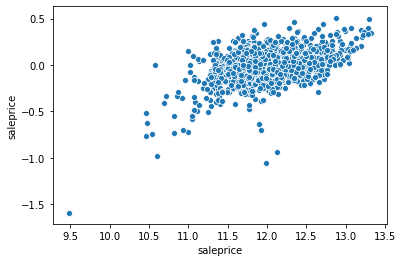

In [194]:
sns.scatterplot(y_train,residuals)

In [118]:
df_5['kitchen_qual'].value_counts(dropna=False)

TA    1047
Gd     805
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64